# <font color='blue'>BIKE SHARING ASSIGNMMENT</font>

<br><br>
## Problem Statement and Description
*******************************************************

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- 1) -  **Which variables are significant in predicting the demand for shared bikes?**
- 2) -  **How well those variables describe the bike demands?**

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Data Preparation

1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
<br><br>
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 
<br><br>
**<font color='red'>The model should be built taking this 'cnt' as the target variable.*</font>**


### Model Evaluation
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

<font color='green'>
from sklearn.metrics import r2_score <br>
r2_score(y_test, y_pred)
</font>
 
- y_test is the test data set for the target variable,
- y_pred is the variable containing the predicted values of the target variable on the test set.


Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.


### Submissions Expected

1. Python Notebook: One Python notebook with the whole linear model, predictions, and evaluation. 

2. Subjective Questions PDF: Apart from the Python notebook, you also need to answer some subjective questions related to linear regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. 


**Note**: There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

<br><br>

### Data Dictionary
-----------------------------------------------------------------

|Column |Description |
| :- | :------------- |
|**instant** |record index |
| --- | --- |
|**dteday** |date |
| --- | --- |
|**season** |season (1 - spring :: 2 - summer :: 3 - fall :: 4 - winter) |
| --- | --- |
|**yr** |year (0: 2018, 1:2019) |
| --- | --- |
|**mnth** |month ( 1 to 12) |
| --- | --- |
|**holiday** |weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) |
| --- | --- |
|**weekday** |day of the week |
| --- | --- |
|**workingday** |if day is neither weekend nor holiday is 1, otherwise is 0. |
| --- | --- |
|**weathersit**  | |
|  |1: Clear, Few clouds, Partly cloudy, Partly cloudy |
|  |2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
|  |3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|  |4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| --- | --- |
|**temp** |temperature in Celsius |
| --- | --- |
|**atemp** |feeling temperature in Celsius |
| --- | --- |
|**hum** |humidity |
| --- | --- |
|**windspeed** |wind speed |
| --- | --- |
|**casual** |count of casual users |
| --- | --- |
|**registered** |count of registered users |
| --- | --- |
|**cnt** |count of total rental bikes including both casual and registered |
| --- | --- |
| --- | --- |



<br><br><br>
#### I Will follow the following Steps for the analysis Process


Step 1 - **Reading, understanding and visualizing the data (EDA).** <br><br>
Step 2 - **Preparing the data for modelling (train-test split, re-scaling, etc.)**<br><br>
Step 3 - **Training the model**<br><br>
Step 4 - **Residual Analysis and Validation of Assumptions**<br><br>
Step 5 - **Predictions and evaluation based on the test set**<br><br>


***************************************************************************************
###  Step 1 - Reading, Understanding and Visualizing the data (EDA) 
***************************************************************************************

In [1]:
# 1.1 - Importing the Libraries and Reading the Data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [2]:
# Importing Libraries and Warnings
# --------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Imports for Linear Regression
# -----------------------------
# sklearn:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# statsmodels:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Reading the Dataset
# ===================

df = pd.read_csv('day.csv')

# Checking how the data looks like
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Checking the shape of the Dataset
# ---------------------------------
df.shape

(730, 16)

In [5]:
# Checking the information provided on the type of columns in the dataset
# -----------------------------------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# 1.2 - Understanding, Visualizing and Cleaning the Data (EDA)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [7]:
# CLEANING
# ========
#
#
# Removing Non-Useful variables
# -----------------------------
# We can remove the 2 non-useful columns from the dataset - 
# 1 - 'instant: 'We see that the 'instant' variable is non-useful, 
#                since it is just an index for the data.
#
# 2 - 'dteday': We also see that the 'dteday' variable is also non-useful,
#               since we already have columns with data like - year, month, weeks.
#               which could have been extracted from 'dteday'
#               so we also drop it.
#

df.drop(['instant','dteday'],axis = 1, inplace = True)

In [8]:
# Before Proceeding, we convert all non-binary variables that are categorical 
# from 'integer' type to 'string'
#
# These columns include - 
#      'season', 'yr', 'mnth', 'holiday',
#      'weekday', 'workingday', 'weathersit'
# ------------------------------------------------------------------------------------------------
def conv_season(x):
    return x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df[['season']] = df[['season']].apply(conv_season)

def conv_year(x):
    return x.map({0: '2018', 1:'2019'})
df[['yr']] = df[['yr']].apply(conv_year)

def conv_months(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 
                  5:'May', 6:'June', 7:'July', 8:'Aug', 
                  9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
df[['mnth']] = df[['mnth']].apply(conv_months)

def conv_holiday(x):
    return x.map({0:'Not Holiday', 1:'Holiday'})
df[['holiday']] = df[['holiday']].apply(conv_holiday)

def conv_working_day(x):
    return x.map({0:'Weekend', 1:'Working Day'})
df[['workingday']] = df[['workingday']].apply(conv_working_day)

def conv_weekday(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 
                  5:'Fri', 6:'Sat', 0:'Sun'})
df[['weekday']] = df[['weekday']].apply(conv_weekday)

def conv_weathersit(x):
    return x.map({1:'Clear/Partly-Cloudy', 
                  2:'Mist/Cloudy', 
                  3:'Light-Rain-Snow/Thunderstorm', 
                  4:'Heavy/Rain/Ice-Pallets/Snow-Fog/Thunderstorm'})
df[['weathersit']] = df[['weathersit']].apply(conv_weathersit)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,Not Holiday,Mon,Working Day,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,Not Holiday,Tue,Working Day,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,Not Holiday,Wed,Working Day,Clear/Partly-Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,Not Holiday,Thur,Working Day,Clear/Partly-Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,Not Holiday,Fri,Working Day,Clear/Partly-Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Listing Numerical Variables in the dataset
# -----------------------------------------
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# VISUALIZING
# ===========

<Figure size 504x504 with 0 Axes>

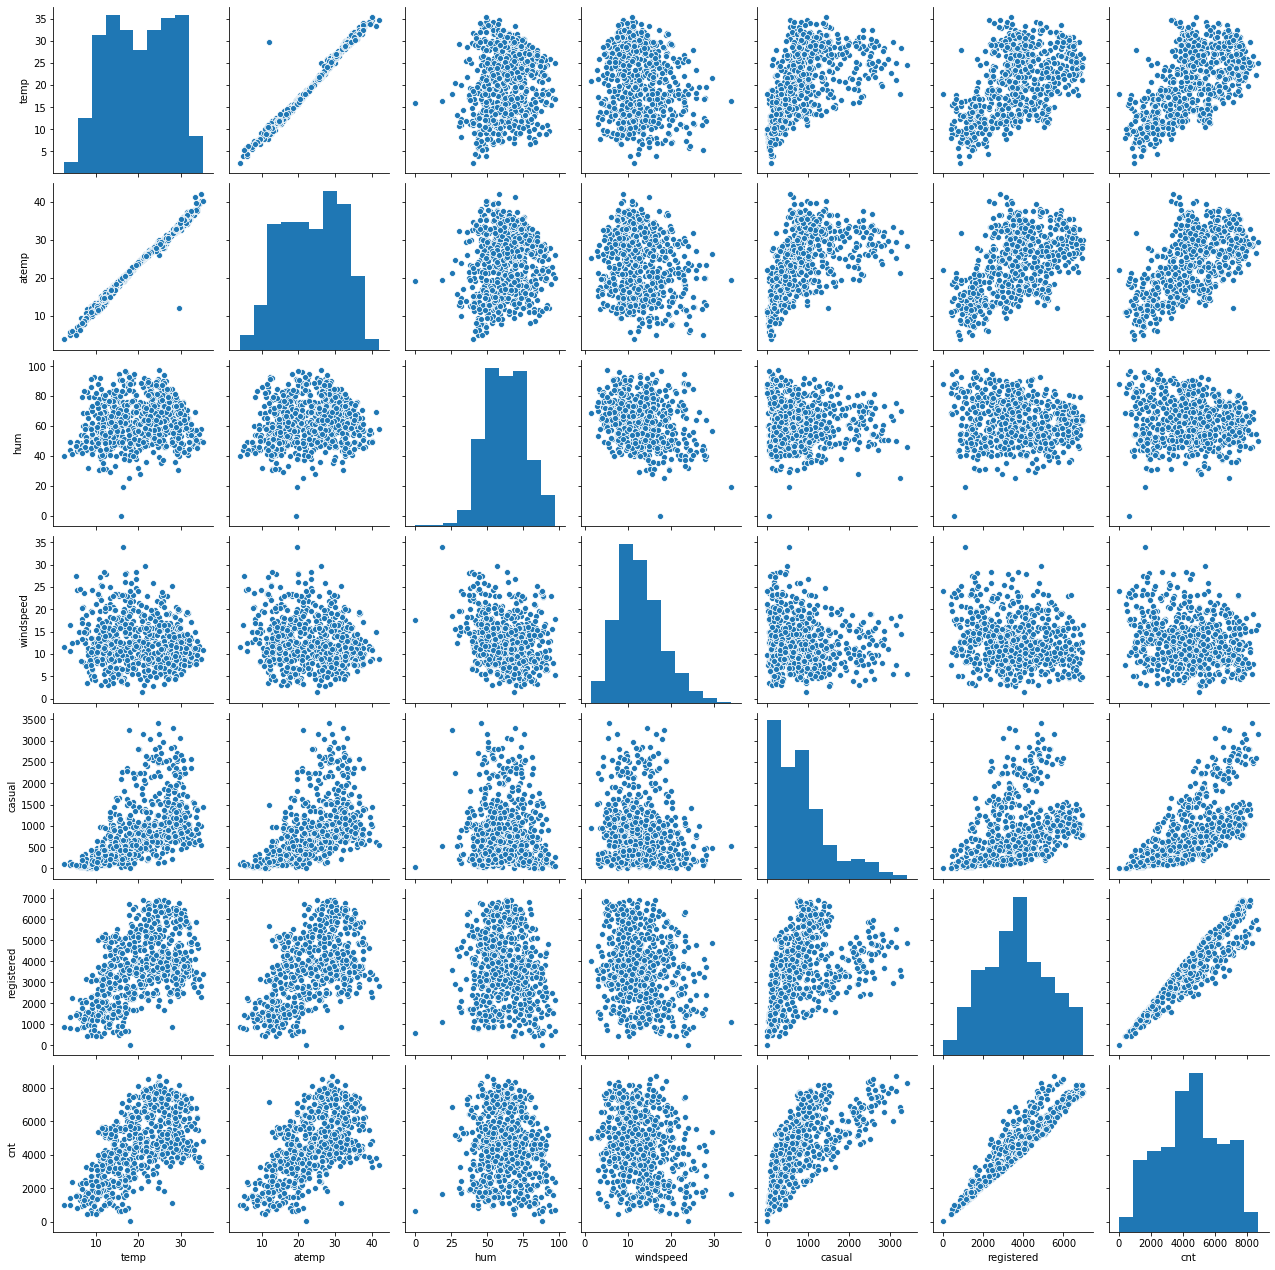

In [12]:
# VISUALIZING NUMERIC VARIABLES - 1 : PAIRPLOT
# ================================================
# Drawing a Pairplot for Numerical Variables
# -------------------------------------------
plt.figure(figsize = (7,7))
sns.pairplot(df_numerical)
plt.show()

In [13]:
# Observations:
# ============
# 1)- We can see a somewhat linear pattern between total number of rentals 'cnt' and temperature in deg C 'tmp'. 
#     Further we can observe that when temperature is in range of 20 to 30, number of rentals go up.
# -----------------------------------------------
# 2)- When we observe month 'mnt' with the total number of rentals 'cnt', we observe that,
#     during the summer and fall months between 5 and 8 (i.e. July and September), number of rentals increases.
# -----------------------------------------------
# 3)- When we obeserve the scatter plot of Total number of rentals to that of humidity (hum) or windspeed (windspeed),
#     we don't observe any linear pattern here.
# ----------------------------------------------------------------------------------------------

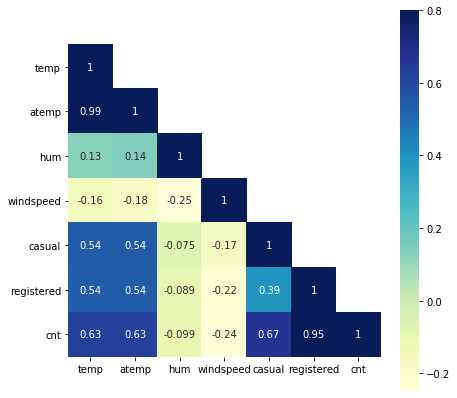

In [14]:
# VISUALIZING NUMERIC VARIABLES - 2 : HEATMAP
# ===========================================
# Visualizing the Correlation between independent Numerical variables using a Heat map
# ------------------------------------------------------------------------------------

# For Plotting only lower half (lower triangle) of Heatmap
# --------------------------------------------------------
cor = df_numerical.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize = (7,7))
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True, cmap='YlGnBu');

plt.show()

In [15]:
# Observations and Inferences - 
# ===========================
# 1- We observe a high correlation of 0.63 when we compare count(cnt) and temperature(tmp)
# --------------------
# 2- We also observe that count and humidity have a negative value of correlation. 
#   (But the strength of correlation is very less.)
# --------------------
# 3- We also observe that count and windspeed have a negative value of correlation.
#   (Here the strength is a little higher than the above correlation)
# ----------------------------------------------------------------------------------------------------

In [16]:

# Listing the Categorical Variables in the dataframe
# --------------------------------------------------
df_categorical = df.select_dtypes(exclude=['int64', 'float64'])
print(list(df_categorical))

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


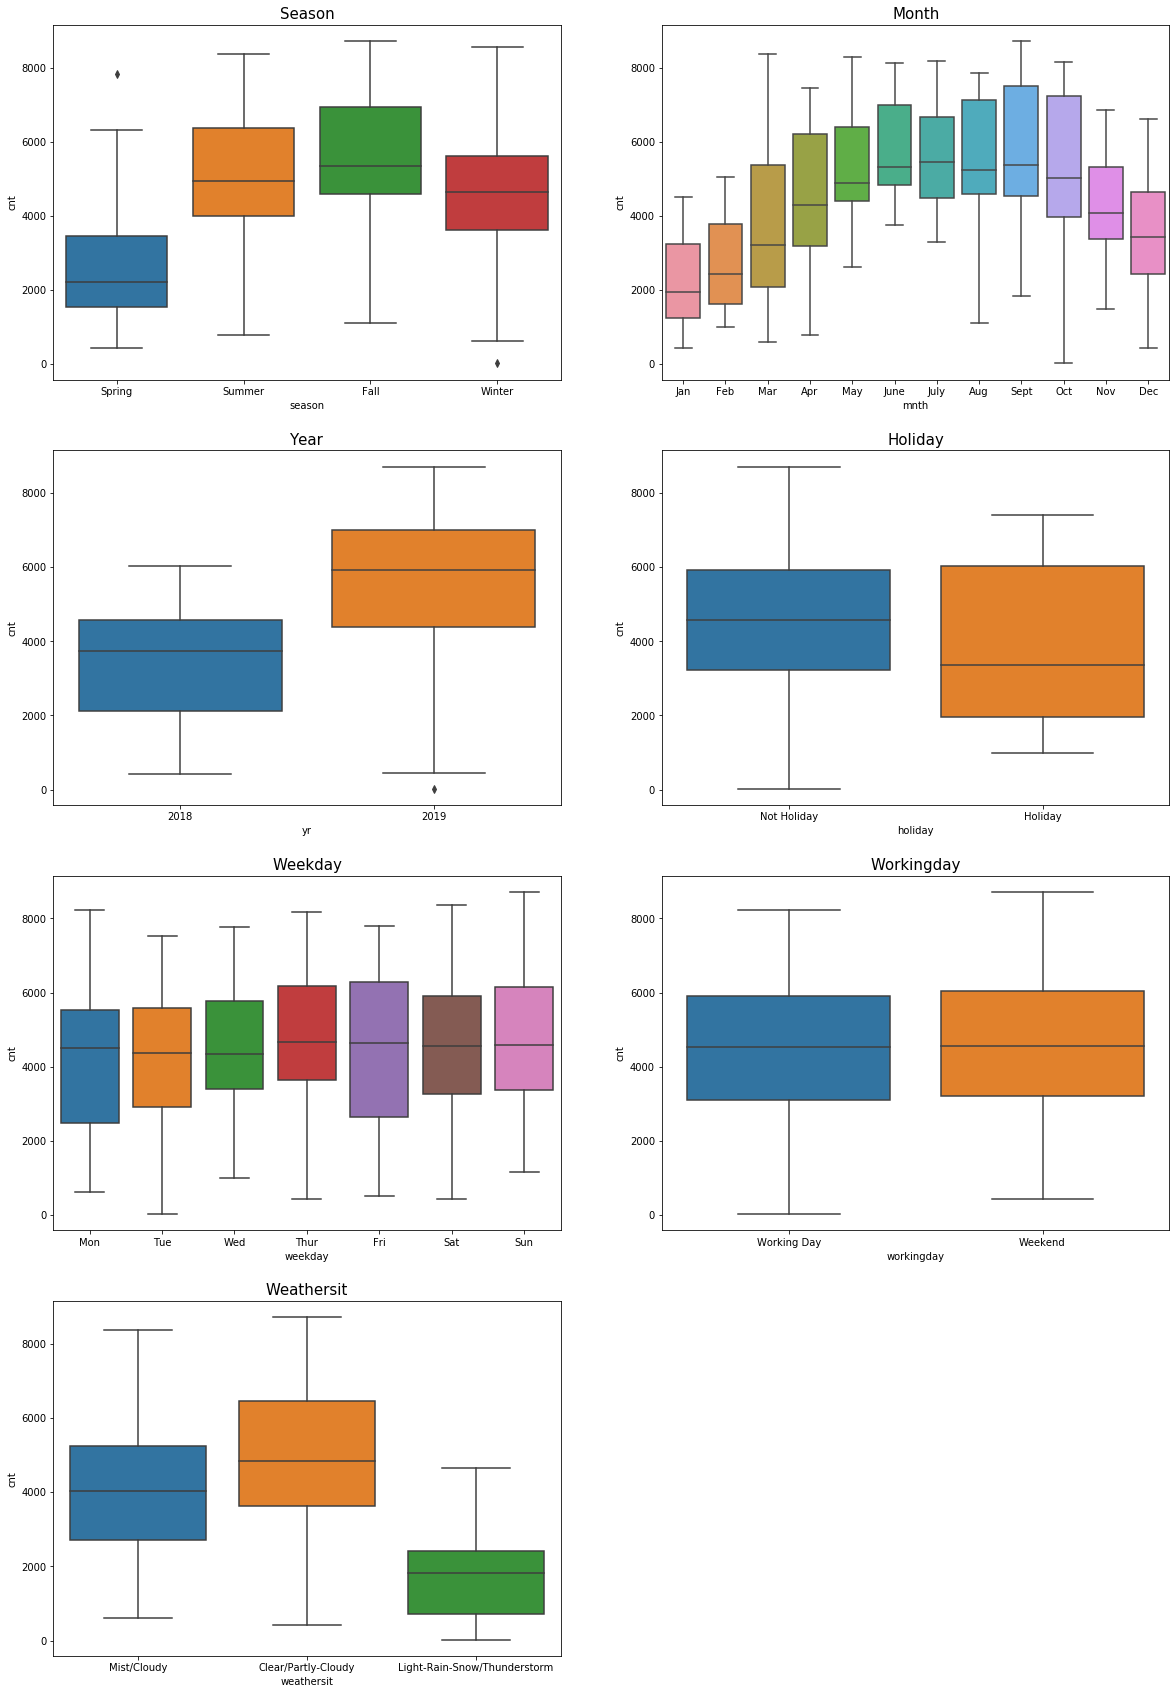

In [17]:
# VISUALIZING CATEGORICAL VARIABLES - 1
# =====================================
# BOXPLOTS
# --------
# These columns include - 
#      'season', 'yr', 'mnth', 'holiday',
#      'weekday', 'workingday', 'weathersit'

plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Season", fontsize=15)

plt.subplot(4,2,2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title("Month", fontsize=15)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title("Year", fontsize=15)

plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title("Holiday", fontsize=15)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title("Weekday", fontsize=15)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title("Workingday", fontsize=15)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Weathersit", fontsize=15)

plt.show()

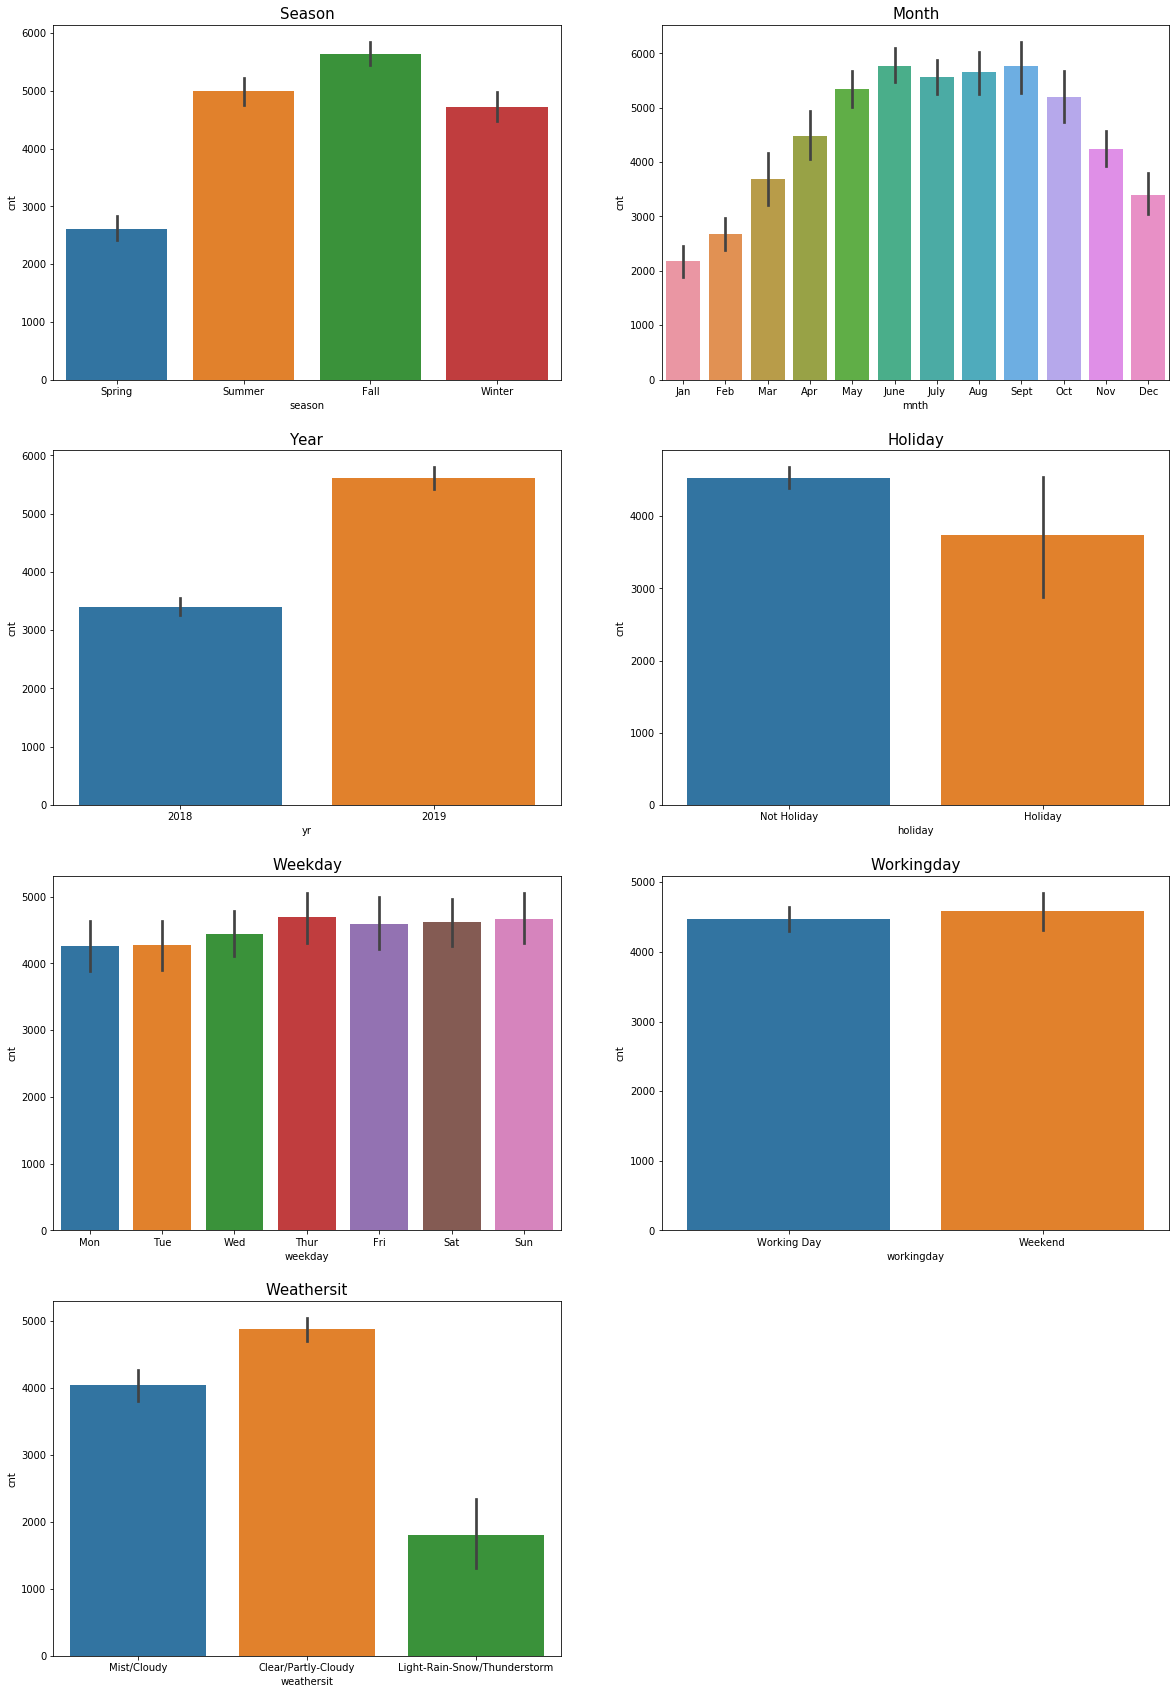

In [18]:
# VISUALIZING CATEGORICAL VARIABLES - 2
# =====================================
# BARPLOTS
# --------
# 
plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
sns.barplot(x='season', y='cnt', data=df)
plt.title("Season", fontsize=15)

plt.subplot(4,2,2)
sns.barplot(x='mnth', y='cnt', data=df)
plt.title("Month", fontsize=15)

plt.subplot(4,2,3)
sns.barplot(x='yr', y='cnt', data=df)
plt.title("Year", fontsize=15)

plt.subplot(4,2,4)
sns.barplot(x='holiday', y='cnt', data=df)
plt.title("Holiday", fontsize=15)

plt.subplot(4,2,5)
sns.barplot(x='weekday', y='cnt', data=df)
plt.title("Weekday", fontsize=15)

plt.subplot(4,2,6)
sns.barplot(x='workingday', y='cnt', data=df)
plt.title("Workingday", fontsize=15)

plt.subplot(4,2,7)
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title("Weathersit", fontsize=15)

plt.show()

In [19]:
# Observation from the Above Figures for Categorical Data:
# =======================================================
# 1-	Season: We observe that during Fall season, the number of bikes rented are the highest followed by Summer season.
# 2-	Month: The highest number of rented bikes was during the month of September, followed by June and August.
# 3-	Year: The number of bikes rented in 2019 was higher that the number of bikes rented in 2018.
# 4-	Holiday: Number of bikes rented on non-holidays are higher in count and also spread wider apart as compared to bikes rented on non-holidays.
# 5-	Weekday: There is not much effect of this variable on the number of bikes rented, but if we were to compare, we observe that more number bikes are rented on a Thursday followed by a Sunday.
# 6-	Workingday: We observe that there is not much difference of bikes rented on a working day and a non-working day(Weekend).
# 7-	Weathersit: We can observe that a customer is more likely to rent a bike on a day with one the following weather features – 
#        a.	Clear
#        b.	Few clouds
#        c.	Partly cloudy


*******************
### Step 2 - Preparing the data for modelling (train-test split, re-scaling, etc.)
*******************

In [20]:
# Sub-Steps include - 
# -----------------
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 2.1 >> Encoding
#     --> Converting Binary categorical variables to 1/0
#     --> Other categorical variables to Dummy Variables.
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 2.2 >> Splitting into Train and Test
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 2.3 >> Re-scaling of variables
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [21]:
# Overview of Data we have
# ------------------------
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,Not Holiday,Mon,Working Day,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,Not Holiday,Tue,Working Day,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,Not Holiday,Wed,Working Day,Clear/Partly-Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,Not Holiday,Thur,Working Day,Clear/Partly-Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,Not Holiday,Fri,Working Day,Clear/Partly-Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,Spring,2018,Jan,Not Holiday,Sat,Weekend,Clear/Partly-Cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,Spring,2018,Jan,Not Holiday,Sun,Weekend,Mist/Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,Spring,2018,Jan,Not Holiday,Mon,Working Day,Mist/Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,Spring,2018,Jan,Not Holiday,Tue,Working Day,Clear/Partly-Cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,Spring,2018,Jan,Not Holiday,Wed,Working Day,Clear/Partly-Cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [22]:
# 2.1 - ENCODING
# ==============
# Step 2.1.1 -->
#       Converting Binary categorical variables to 1/0
#       Binary Categorcial Variables we have are - 'yr', 'holiday', 'workingday'.

In [23]:
# Conversion for Year 'yr'
def bin_year(x):
    if x == '2018':
        return 0
    else:
        return 1

df['yr'] = df['yr'].apply(bin_year)
# ----------------------------------------------------------------
# Conversion for Holiday or Not Holiday 'holiday'
def bin_holiday(x):
    if x=='Holiday':
        return 1
    else:
        return 0
    
df['holiday'] = df['holiday'].apply(bin_holiday)
# ----------------------------------------------------------------
# Conversion for working day or not working day 'workingday'
def bin_workingday(x):
    if x == 'Weekend':
        return 0
    else:
        return 1

df['workingday'] = df['workingday'].apply(bin_workingday)
# ----------------------------------------------------------------
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear/Partly-Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thur,1,Clear/Partly-Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear/Partly-Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
# 2.1 - ENCODING
# ==============
# Once we have completed encoding Binary categorical variables, 
# we will work on the remaining categorical variables
# 
# Step 2.1.2 -->
# Converting Other categorical variables to Dummy Variables.
# Binary Categorcial Variables, that we have are - 'season', 'mnth', 'weekday', 'weathersit'

In [25]:
# Converting Multiple columns to Dummy variables

In [26]:
df_non_binary_categorical = df[['season','mnth','weekday','weathersit']]

# One Hot Encoding (OHE) by using the get_dummies()
# We will also remove the redundant column using --> drop_first argument in get_dummies()
# Reference - https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

df_dummies = pd.get_dummies(df_non_binary_categorical, drop_first = True)
df_dummies.head(5)

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Now we can drop the original categorical columns:
# ------------------------------------------------
df = df.drop(df_non_binary_categorical, axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
# Concatenating the Dummy Dataset 'df_dummies' with the main dataset 'df'
# -----------------------------------------------------------------------
df = pd.concat([df, df_dummies], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 2.2 Test-Train Split
# ====================
# Splitting the Data into Train and Test (Train-Test Split)
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)   # We specify this so that the train and 
                    # test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

print("Shape of TRAIN:",df_train.shape)
print("Shape of TEST: ",df_test.shape)

Shape of TRAIN: (547, 32)
Shape of TEST:  (183, 32)


In [30]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# 2.3 Re-Scaling
# ==============
# Rescaling is very important in Multiple Linear Regression
# We will use the Min-Max Scaling (Normalization) for this dataset
#
# Instantiate an Object
scaler = MinMaxScaler()
# Since we have already scaled the categorical variables
# i.e. all their values are between 0 and 1.
# So, we will only scale the numerical variables here
# 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']

# Applying fit-transform on the data.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.113990,0.549957,0.481247,...,0,0,0,0,0,1,0,0,0,0
523,1,0,0,0.735215,0.680985,0.482181,0.286093,0.452911,0.899220,0.887483,...,0,0,0,1,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.038098,0.402541,0.335136,...,0,0,0,0,0,1,0,0,0,1
413,1,0,1,0.358285,0.362754,0.550880,0.319514,0.436757,0.413370,0.494248,...,0,0,1,0,0,0,0,0,0,0
253,0,0,1,0.740406,0.695906,0.735509,0.156398,0.497105,0.489893,0.578003,...,0,1,0,0,0,0,1,0,0,0


*********************
### Step 3 - Building and Training the Model
*********************

<br>

##### Some things we will consider while building the model are:<br>
1) We will remove/drop those columns which show high multi-collinearity i.e. their VIF value >5.<br>
2) We will assume an alpha of 0.05 for the models.<br>
3) Thus we would be able to drop insignificant columns, i.e. columns with P-value > 0.05.<br>
<br>

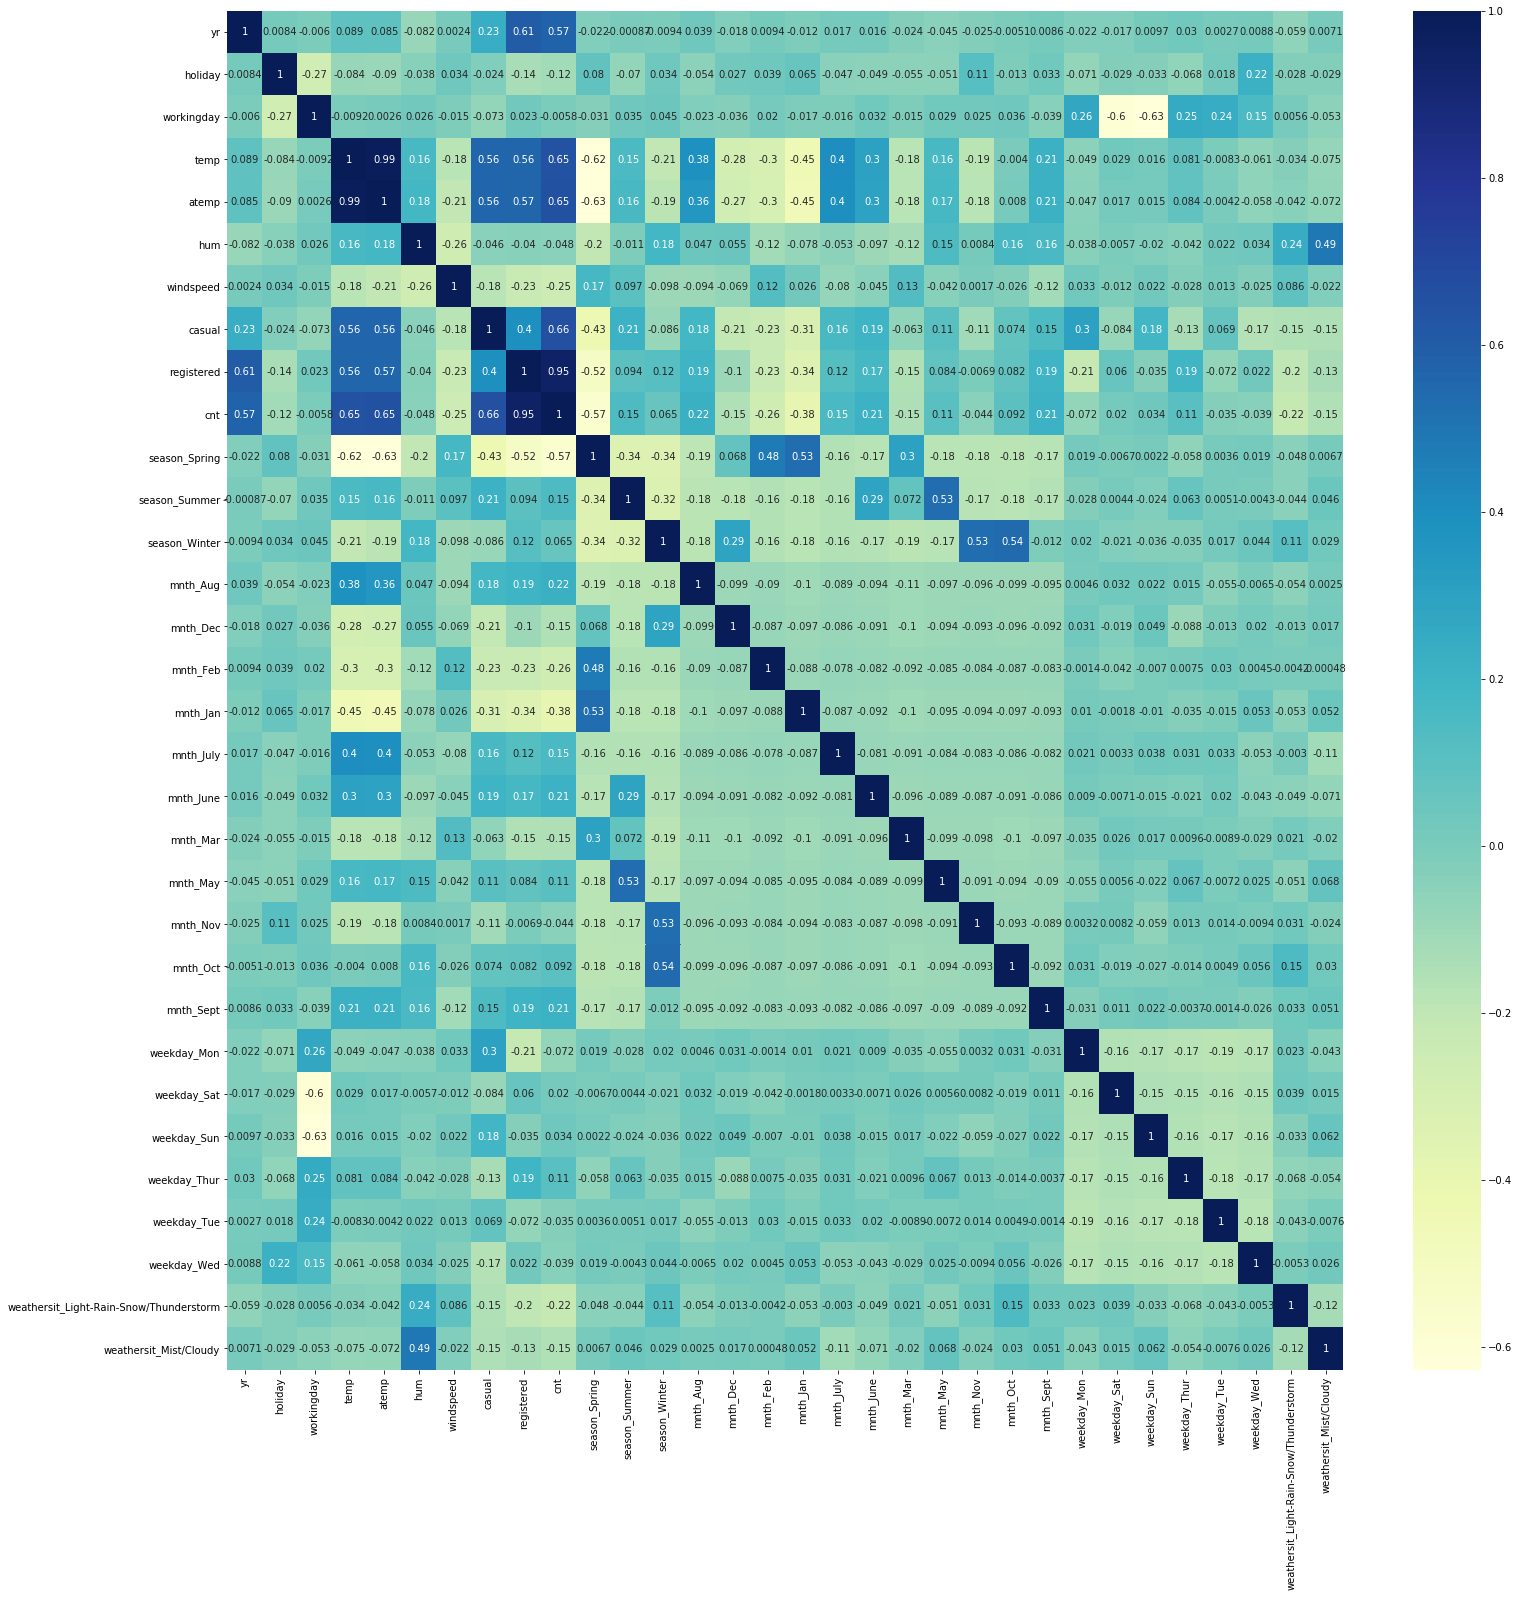

In [32]:
# HEATMAP
# =======
# We will now check the correlation coefficients to see which variables are highly correlated
# --------------------------------------------------------------------------------------------

correlation1 = df_train.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation1, annot=True, cmap='YlGnBu')
plt.show()

In [134]:
# Observations
# ============
# - We observe that 'temp' and 'atemp' are highly correlated.
# - We also observe a high correlation between 'registered' and 'casual'
# - We can also find a high correlation between some months and some seasons.
# - Another high correlation is observed between 'hum'(humidity) and weathersit_Mist/Cloudy.

In [33]:
df.shape

(730, 32)

In [34]:
# We can observe that there are a high number of columns/independent variables in the dataset.
# For feature selection, it will more efficient to make use of RFE (Recursive Feature Elimination)
# for selecting the top features.
# For this we need to consider 15 top variables.

In [35]:
# Assigning values to X_train and y_train variables
# -------------------------------------------------
y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
# Creating a Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# ---------------------------------------------------------
# ---------- RFE (Recursive Feature Elimination) ----------
# ---------------------------------------------------------
# Running RFE with O/P value as 15
# --------------------------------
rfe = RFE(lr, 15)             
rfe = rfe.fit(X_train, y_train)

In [38]:
# Listing all the feature with its rank:
# =====================================
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 13),
 ('windspeed', False, 12),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 11),
 ('season_Winter', False, 17),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', True, 1),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 15),
 ('mnth_Sept', False, 16),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 3),
 ('weekday_Thur', False, 4),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 8),
 ('weathersit_Light-Rain-Snow/Thunderstorm', False, 7),
 ('weathersit_Mist/Cloudy', False, 10)]

In [39]:
# The indepdendent variables to be selected are - 
# ---------------------------------------------
col = X_train.columns[rfe.support_]
print("Independent columns that we SELECTED w.r.t RFE: ", list(col))
print("\n\n")
print("Independent columns that we REJECTED w.r.t.RFE: ", list(X_train.columns[~rfe.support_]))

Independent columns that we SELECTED w.r.t RFE:  ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'casual', 'registered', 'season_Spring', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Nov', 'weekday_Mon']



Independent columns that we REJECTED w.r.t.RFE:  ['hum', 'windspeed', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light-Rain-Snow/Thunderstorm', 'weathersit_Mist/Cloudy']


In [40]:
# Creating X_test dataframe with RFE selected variables
# -----------------------------------------------------
X_train_RFE = X_train[col]
X_train_RFE.head()

,yr,holiday,workingday,temp,atemp,casual,registered,season_Spring,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Nov,weekday_Mon
311,0,0,1,0.435124,0.437339,0.113990,0.549957,0,0,0,0,0,0,1,0
523,1,0,0,0.735215,0.680985,0.452911,0.899220,0,0,0,0,0,1,0,0
381,1,0,1,0.391151,0.374375,0.038098,0.402541,1,0,0,1,0,0,0,0
413,1,0,1,0.358285,0.362754,0.436757,0.413370,1,0,1,0,0,0,0,1
253,0,0,1,0.740406,0.695906,0.497105,0.489893,0,0,0,0,0,0,0,0


In [41]:
# Running Model 1
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_1 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_1 = lr_mod_1.fit()

#Let's see the summary of our linear model
print(lr_mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.623e+29
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:16:04   Log-Likelihood:                 17591.
No. Observations:                 547   AIC:                        -3.515e+04
Df Residuals:                     531   BIC:                        -3.508e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.967e-16   6.67e-16      0.894

In [42]:
# Calculate the VIFs (Variance Inflation Factor):
# ----------------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,355.71
3,temp,349.95
6,registered,21.15
5,casual,5.35
0,yr,4.48
2,workingday,4.07
7,season_Spring,3.33
10,mnth_Jan,2.17
9,mnth_Feb,1.94
14,weekday_Mon,1.83


In [43]:
# Obeservations for Model 1
# -------------------------
# We find R = 1.0, which means that the Model 1 overfitted.
# One of the reasons for this might be Multi-collinearity.
# The variable 'temp' has the highest P-value (0.988)
# The variable 'atemp' has the highest VIF value(355.71),
# So we can drop the column 'atemp' columns.

In [44]:
# ------------------------------------------------------------------------

In [45]:
# Dropping the 'atemp' columns
# ----------------------------
X_train_RFE.drop('atemp', axis=1, inplace=True)

# ------------------------------------------------------------------------
# Running Model 2 ('temp' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_2 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_2 = lr_mod_2.fit()

#Let's see the summary of our linear model
print(lr_mod_2.summary())

# ------------------------------------------------------------------------

# Printing the VIF Values:
# =======================
# Calculate the VIFs (Variance Inflation Factor):
# ----------------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("VIF Values --> ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.649e+29
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:16:04   Log-Likelihood:                 17782.
No. Observations:                 547   AIC:                        -3.553e+04
Df Residuals:                     532   BIC:                        -3.547e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.021e-16    4.7e-16      1.918

In [46]:
# Obeservations for Model 2
# -------------------------
# We find R = 1.0, which means that the Model 2 also overfitted.
# One of the reasons for this might be Multi-collinearity.
# The variable 'mnth_July' has the highest P-value (0.939)
# The variable 'registered' has the highest VIF value(20.93),
# So we drop the column 'registered' columns.

In [47]:
# ------------------------------------------------------------------------

In [48]:
# Droppin the 'registered' Column
X_train_RFE.drop('registered', inplace=True, axis=1)

# Running Model 3 ('registered' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_3 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_3 = lr_mod_3.fit()

#Let's see the summary of our linear model
print(lr_mod_3.summary())

# ------------------------------------------------------------------------

# Printing the VIF Values:
# =======================
# Calculate the VIFs (Variance Inflation Factor):
# ----------------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("VIF Values --> ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.21e-191
Time:                        10:16:04   Log-Likelihood:                 516.11
No. Observations:                 547   AIC:                            -1004.
Df Residuals:                     533   BIC:                            -944.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1752      0.023      7.694

In [49]:
# Obeservations for Model 3
# -------------------------
# We find R = 0.824, which is a very high value.
# We also find the P-value of mnth_June as (0.986) to be the highest.
# The VIF score for temp is (7.94), which is still high
# We drop the 'temp' column then.

In [50]:
# ------------------------------------------------------------------------

In [51]:
# Dropping the 'temp' column
X_train_RFE.drop('temp', inplace=True, axis=1)

# Running Model 4 ('temp' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_4 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_4 = lr_mod_4.fit()

#Let's see the summary of our linear model
print(lr_mod_4.summary())

# ------------------------------------------------------------------------

# Printing the VIF Values:
# =======================
# Calculate the VIFs (Variance Inflation Factor):
# ----------------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("VIF Values --> ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     178.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.52e-178
Time:                        10:16:04   Log-Likelihood:                 481.18
No. Observations:                 547   AIC:                            -936.4
Df Residuals:                     534   BIC:                            -880.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3333      0.014     23.738

In [52]:
# Observations for Model 4
# ------------------------
# We observe an R-Score of 0.801 which can be considered as a good score.
# Since we observe that we have removed/dropped all the variables with VIF > 5,
#   thus we can say that any multi-collinearity there might have been has been removed
#
# ************** Now, we won't be requiring VIF scores any more. **************
#
#
# Now we can look at the P-Scores/P-values to drop the insignificant variables.
# We will take one variable at a time, starting with the highest P-value and drop them.
#
# The variable with the highest P-score is 'mnth_July' with P=0.378
#  So we drop 'mnth_July'

In [53]:
# ------------------------------------------------------------------------

In [54]:
# Dropping ''mnth_July'
X_train_RFE.drop('mnth_July', inplace=True, axis=1)

# Running Model 5 ('mnth_July' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_5 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_5 = lr_mod_5.fit()

#Let's see the summary of our linear model
print(lr_mod_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.65e-179
Time:                        10:16:04   Log-Likelihood:                 480.79
No. Observations:                 547   AIC:                            -937.6
Df Residuals:                     535   BIC:                            -885.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3350      0.014     24.069

In [55]:
# Observations for Model 5
# ------------------------
# We observe an R-value of 0.80 which is still very good.
# But we still have some insignificant variables to drop.
# The variable with highest P-value is 'mnth_Feb' with value of 0.169.
# Thus we drop 'mnth_Feb'

In [56]:
# ------------------------------------------------------------------------

In [57]:
# Dropping 'mnth_Feb'
X_train_RFE.drop('mnth_Feb', inplace=True, axis=1)

# Running Model 6 ('mnth_Feb' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_6 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_6 = lr_mod_6.fit()

#Let's see the summary of our linear model
print(lr_mod_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.97e-180
Time:                        10:16:04   Log-Likelihood:                 479.82
No. Observations:                 547   AIC:                            -937.6
Df Residuals:                     536   BIC:                            -890.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3328      0.014     24.051

In [58]:
# Observations for Model 6
# ------------------------
# We observe an R-value of 0.80 which is still very good.
# But we still have some insignificant variables to drop.
# The variable with highest P-value is 'mnth_Dec' with value of 0.247.
# Thus we drop 'mnth_Dec'

In [59]:
# Dropping 'mnth_Dec'
X_train_RFE.drop('mnth_Dec', inplace=True, axis=1)

# Running Model 7 ('mnth_Dec' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_7 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_7 = lr_mod_7.fit()

#Let's see the summary of our linear model
print(lr_mod_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     237.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.81e-181
Time:                        10:16:04   Log-Likelihood:                 479.13
No. Observations:                 547   AIC:                            -938.3
Df Residuals:                     537   BIC:                            -895.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3278      0.013     24.906

In [60]:
# Observations for Model 7
# ------------------------
# We observe an R-value of 0.799 which is still very good.
# But we still have some insignificant variables to drop.
# The variable with highest P-value is 'mnth_Nov' with value of 0.140.
# Thus we drop 'mnth_Nov'

In [61]:
# Droppin 'mnth_Nov'
X_train_RFE.drop('mnth_Nov', inplace=True, axis=1)

# Running Model 8 ('mnth_Nov' removed)
# ===============
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_RFE)

# Running the linear model
lr_mod_8 = sm.OLS(y_train,X_train_sm)

# Fitting the Model
lr_mod_8 = lr_mod_8.fit()

#Let's see the summary of our linear model
print(lr_mod_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     266.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.73e-181
Time:                        10:16:04   Log-Likelihood:                 478.02
No. Observations:                 547   AIC:                            -938.0
Df Residuals:                     538   BIC:                            -899.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3228      0.013     25.350

In [62]:
# Observations for Model 8
# ========================
# We observe an R-value of 0.798 which is still very good.
# Now we have the P-values of all remaining variables as < 0.05.
# Thus we can conclude that that all the variables are significant.
# 
# Apart from the P-values, we can also confirm the significance of variable 
# by observing a very high value of F-Statistic = 266.
#
# Thus we can conclude this to be the final model.
#

In [63]:
# We assign the value of model 8 to a new variable named as final model.
# ======================================================================

lr_final_model = lr_mod_8

***********************
### Step 4 - Residual Analysis
***********************

In [64]:
# Before proceeding with applying the model to the test set, 
# we should first validate the residuals and analyze them.

In [88]:
# -------------------------------------------------------------
# -------------------- Residual Analysis ----------------------
# -------------------------------------------------------------

In [65]:
# Predicting the values from the model
# ====================================
y_train_predicted = lr_final_model.predict(X_train_sm)

# Residual Error values:
# ----------------------
residuals = y_train - y_train_predicted


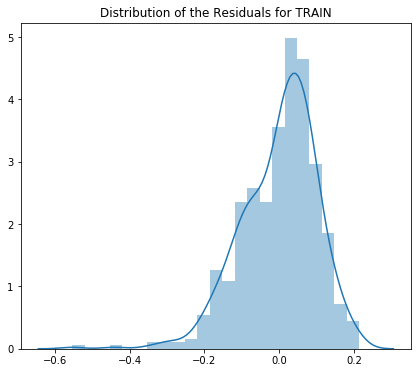

In [66]:
# Checking the Distribution of the Residual Error Values
# ------------------------------------------------------
# DISTPLOT
# --------

plt.figure(figsize = (7,6))
sns.distplot(residuals)
plt.title("Distribution of the Residuals for TRAIN")
plt.show()

********
### Step 5 - Predictions and Evaluations on the Test Set
********

In [68]:
# After completing the residual analysis, we can final move to prediction.
# Here we test the model on the test set.

In [69]:
# First, we Transform the Test dataset using the scalar that has been fit on the Training Dataset
# ------------------------------------------------------------------------------------------------
num_vars = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,1,0,0,0,0,0,0


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light-Rain-Snow/Thunderstorm,weathersit_Mist/Cloudy
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.606557,0.568688,0.542076,0.635166,0.316439,0.271865,0.536644,0.530233,...,0.076503,0.087432,0.120219,0.196721,0.169399,0.147541,0.092896,0.136612,0.032787,0.300546
std,0.500765,0.178567,0.489854,0.234887,0.219336,0.152926,0.159371,0.226456,0.209876,0.215783,...,0.266530,0.283242,0.326109,0.398610,0.376133,0.355617,0.291083,0.344380,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.096007,0.396694,0.393293,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.227370,0.541582,0.533134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.362085,0.670084,0.681086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.969679,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# We observe that max values of some of these are not exactly = 1.

In [72]:
# Now we can distribute the test dataset into target variable and independent variables.

In [73]:
y_test = df_test.pop('cnt')

In [74]:
X_test = df_test

In [75]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             183 non-null    int64  
 1   holiday        183 non-null    int64  
 2   workingday     183 non-null    int64  
 3   temp           183 non-null    float64
 4   atemp          183 non-null    float64
 5   casual         183 non-null    float64
 6   registered     183 non-null    float64
 7   season_Spring  183 non-null    uint8  
 8   mnth_Dec       183 non-null    uint8  
 9   mnth_Feb       183 non-null    uint8  
 10  mnth_Jan       183 non-null    uint8  
 11  mnth_July      183 non-null    uint8  
 12  mnth_June      183 non-null    uint8  
 13  mnth_Nov       183 non-null    uint8  
 14  weekday_Mon    183 non-null    uint8  
dtypes: float64(4), int64(3), uint8(8)
memory usage: 12.9 KB


In [76]:
# Add the constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,casual,registered,season_Spring,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Nov,weekday_Mon
184,1.0,0,1,0,0.831783,0.769660,0.933557,0.427086,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.265163,0.767976,0,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.072539,0.346376,0,0,0,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.268820,0.559630,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.223712,0.608143,0,0,0,0,0,1,0,0


In [77]:
# Dropped columns from the above Linear Models
X_test_sm.drop(['temp','atemp','registered','mnth_Nov', 'mnth_Dec', 'mnth_Feb', 'mnth_July'],
               inplace=True, axis=1)


In [78]:
# ----------------------------
# Making the Predictions
# ----------------------------
y_test_pred = lr_final_model.predict(X_test_sm)

In [79]:
# Evaluating the Model
# ====================

# R-Squared Value
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
print("R-Squared Value : ", r2)

# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_test_pred, squared=False)
print("Root Mean Squared Error Value : ",rms)

R-Squared Value :  0.7872157505050228
Root Mean Squared Error Value :  0.09926514984216941


In [80]:
# From observing the R-Square value, we can say that - 
# Whatever the model has learned on the Training Set, 
#  it has generalized well on the Test Set.

# Also we observe a low value of Root Mean Squared Error value, 
#  which describes the model as good.

<br><br>
#### We can see that the equation of our best fitted line is:
****************
cnt = 0.3228 + (0.5163 * casual) + (0.2033 * yr) + (0.0395 * mnth_June) + (0.0271 * workingday) - (0.1130 * holiday) - (0.1574 * season_Spring) - (0.0445 * mnth_Jan) - (0.1360 * weekday_Mon)
********************

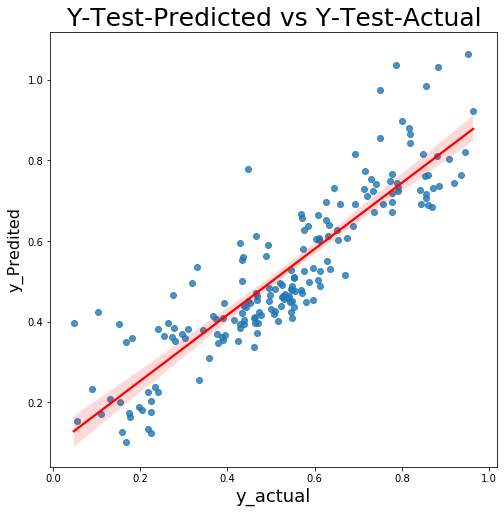

In [81]:
# Let's now plot the graph for actual versus predicted values.
# ------------------------------------------------------------

# Plotting y_test and y_pred to understand the spread

plt.figure(figsize = (8,8))


sns.regplot(y_test, y_test_pred, line_kws={"color": "red"})
plt.title('Y-Test-Predicted vs Y-Test-Actual', fontsize = 25)
plt.xlabel('y_actual', fontsize = 18)
plt.ylabel('y_Predited', fontsize = 16)      

plt.show()

In [99]:
# -----------------------------------------------------------------------

*************************
### Validation of Assumptions
*************************

In [133]:
# Assumption 1 - There is a linear Relationship b/w features and target.
# ============   =======================================================
# We can validate these from the pairplot we plotted for the numerical variables.
# We saw that all the predictor variables showed a lineare relation ship with the Target variable

In [100]:
# -------------------------------------------------------------------------

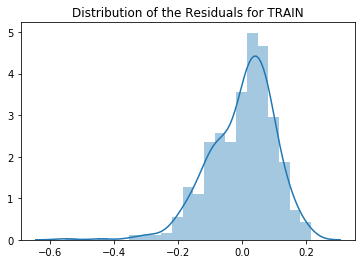

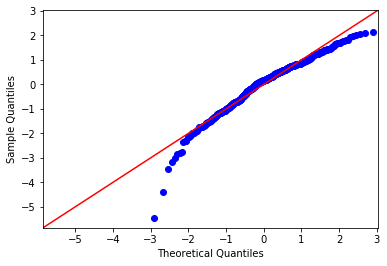

In [105]:
# Assumption 2 - Error Terms are Normally Distributed
# ============   ====================================

# Checking the Distribution of the Residual Error Values
# ------------------------------------------------------

# DISTPLOT
# --------
sns.distplot(residuals)
plt.title("Distribution of the Residuals for TRAIN")

# Plotting Residuals using quantile-quantile plots (q-q plots)
# ------------------------------------------------------------
sm.qqplot(residuals, fit=True, line='45')

plt.show()

In [106]:
# Thus, from the above two plots, we can confirm that Residuals/Error terms
# are Normally distributed with mean=0.

In [ ]:
# -------------------------------------------------------------------------

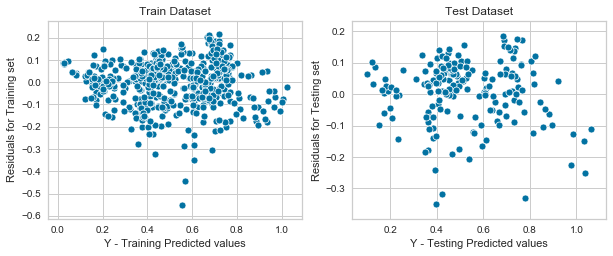

In [130]:
# Assumption 3 - Homoscedasticity: The variance of residual is the same for any value of X.
# ============   ==========================================================================

residuals_train = y_train - y_train_predicted
residuals_test = y_test - y_test_pred

# plotting 
# --------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.scatterplot(x=y_train_predicted, y=residuals_train)
plt.title('Train Dataset')
plt.xlabel('Y - Training Predicted values')
plt.ylabel('Residuals for Training set')

plt.subplot(2,2,2)
sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.title('Test Dataset')
plt.xlabel('Y - Testing Predicted values')
plt.ylabel('Residuals for Testing set')

plt.show()


In [131]:
# From the above plot, we are unable to interpret any pattern.
# Thus we can say that Model is Homoscedastic.
# Hence Assumption 3 is validated.

In [ ]:
# -------------------------------------------------------------------------

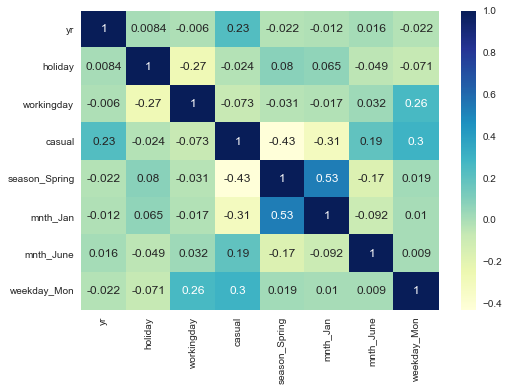

In [132]:
# Assumption 4 - Little or no Multicollinearity between the features
# ============   ===================================================

# Plotting the Heatmap
# --------------------
sns.heatmap(X_train_RFE.corr(), annot=True,cmap='YlGnBu')

In [ ]:
# From the above heatmap, we can say that correlation coefficients 
# of each feature with respect to one another turn out to be <= 0.3.
# Thus the features aren’t highly correlated with each other.
# Hence Assumption 4 is validated.

In [ ]:
# -------------------------------------------------------------------------

**********************************
********************************
***********************************